In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_best_single_factor_test = pd.read_csv('mAb_best_single_factor_test.tsv', sep='\t', header=0)
y_best_single_factor_test = data_best_single_factor_test.iloc[:, 1]

data_CDRS_models_test = pd.read_csv('mAb_CDRS_models_test.tsv', sep='\t', header=0)
y_CDRS_model_test = data_CDRS_models_test.iloc[:, 1]

data_single_test = pd.read_csv('mAb_single_test.tsv', sep='\t', header=0)
y_single_test = data_single_test.iloc[:, 1]

data_ensemble_test = pd.read_csv('mAb_ensemble_test.tsv', sep='\t', header=0)
y_ensemble_test = data_ensemble_test.iloc[:, 1]


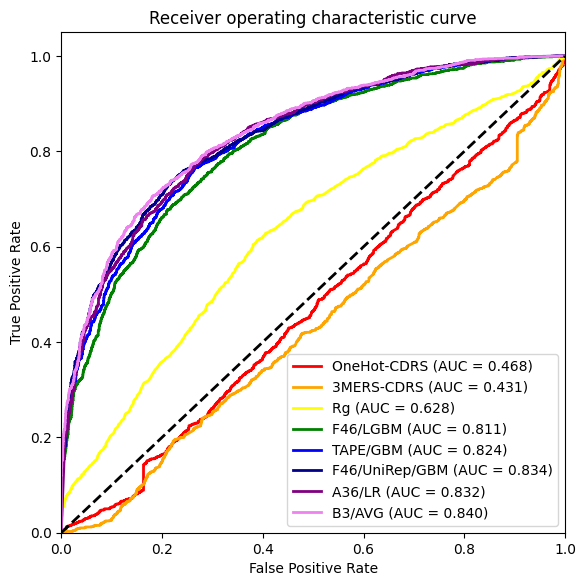

In [3]:
# Figure 2A
plt.figure(figsize=(6.5,6.5))

data_onehot_CDRS_test = data_CDRS_models_test.iloc[:, 2]
fpr_onehot_CDRS_test, tpr_onehot_CDRS_test, thres_onehot_CDRS_test = roc_curve(y_CDRS_model_test, data_onehot_CDRS_test, pos_label=1)
auc_onehot_CDRS_test = roc_auc_score(y_CDRS_model_test, data_onehot_CDRS_test)
plt.plot(fpr_onehot_CDRS_test, tpr_onehot_CDRS_test, color='red', lw=2, label='OneHot-CDRS'+' (AUC = %.3f)'%auc_onehot_CDRS_test)

data_3mers_CDRS_test = data_CDRS_models_test.iloc[:, 3]
fpr_3mers_CDRS_test, tpr_3mers_CDRS_test, thres_3mers_CDRS_test = roc_curve(y_CDRS_model_test, data_3mers_CDRS_test, pos_label=1)
auc_3mers_CDRS_test = roc_auc_score(y_CDRS_model_test, data_3mers_CDRS_test)
plt.plot(fpr_3mers_CDRS_test, tpr_3mers_CDRS_test, color='orange', lw=2, label='3MERS-CDRS'+' (AUC = %.3f)'%auc_3mers_CDRS_test)

data_Rg_test = data_best_single_factor_test.iloc[:, 2]
fpr_Rg_test, tpr_Rg_test, thres_Rg_test = roc_curve(y_best_single_factor_test, data_Rg_test, pos_label=1)
auc_Rg_test = roc_auc_score(y_best_single_factor_test, data_Rg_test)
plt.plot(fpr_Rg_test, tpr_Rg_test, color='yellow', lw=2, label='Rg'+' (AUC = %.3f)'%auc_Rg_test)

data_F46_LGBM_test = data_single_test.iloc[:, 3]
fpr_F46_LGBM_test, tpr_F46_LGBM_test, thres_F46_LGBM_test = roc_curve(y_single_test, data_F46_LGBM_test, pos_label=1)
auc_F46_LGBM_test = roc_auc_score(y_single_test, data_F46_LGBM_test)
plt.plot(fpr_F46_LGBM_test, tpr_F46_LGBM_test, color='green', lw=2, label='F46/LGBM'+' (AUC = %.3f)'%auc_F46_LGBM_test)

data_TAPE_GBM_test = data_single_test.iloc[:, 10]
fpr_TAPE_GBM_test, tpr_TAPE_GBM_test, thres_TAPE_GBM_test = roc_curve(y_single_test, data_TAPE_GBM_test, pos_label=1)
auc_TAPE_GBM_test = roc_auc_score(y_single_test, data_TAPE_GBM_test)
plt.plot(fpr_TAPE_GBM_test, tpr_TAPE_GBM_test, color='blue', lw=2, label='TAPE/GBM'+' (AUC = %.3f)'%auc_TAPE_GBM_test)

data_F46_UniRep_GBM_test = data_single_test.iloc[:, 22]
fpr_F46_UniRep_GBM_test, tpr_F46_UniRep_GBM_test, thres_F46_UniRep_GBM_test = roc_curve(y_single_test, data_F46_UniRep_GBM_test, pos_label=1)
auc_F46_UniRep_GBM_test = roc_auc_score(y_single_test, data_F46_UniRep_GBM_test)
plt.plot(fpr_F46_UniRep_GBM_test, tpr_F46_UniRep_GBM_test, color='darkblue', lw=2, label='F46/UniRep/GBM'+' (AUC = %.3f)'%auc_F46_UniRep_GBM_test)

data_LR_A36_test = data_ensemble_test.iloc[:, 10]
fpr_LR_A36_test, tpr_LR_A36_test, thres_LR_A36_test = roc_curve(y_ensemble_test, data_LR_A36_test, pos_label=1)
auc_LR_A36_test = roc_auc_score(y_ensemble_test, data_LR_A36_test)
plt.plot(fpr_LR_A36_test, tpr_LR_A36_test, color='purple', lw=2, label='A36/LR'+' (AUC = %.3f)'%auc_LR_A36_test)

data_AVG_B3_test = data_ensemble_test.iloc[:, 8]
fpr_AVG_B3_test, tpr_AVG_B3_test, thres_AVG_B3_test = roc_curve(y_ensemble_test, data_AVG_B3_test, pos_label=1)
auc_AVG_B3_test = roc_auc_score(y_ensemble_test, data_AVG_B3_test)
plt.plot(fpr_AVG_B3_test, tpr_AVG_B3_test, color='violet', lw=2, label='B3/AVG'+' (AUC = %.3f)'%auc_AVG_B3_test)

plt.plot([0,1],[0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic curve")
plt.legend(loc='lower right')

plt.show()